In [1]:
import networkx as nx
import numpy as np
import os
import io
import json
from multiprocessing import Process
import multiprocessing
import matplotlib.pyplot as plt

In [3]:
g = nx.read_graphml("../data/NET-btc-heur_0-week/2012-04-23.graphml")

def degree_dist(G):
    degs = {}
    for n in G.nodes():
        deg = G.degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] += 1
        
    return sorted(degs.items())

G_degree_dist = degree_dist(g)
G_x = [k for (k,v) in G_degree_dist]
G_y = [v/len(g.nodes()) for (k,v) in G_degree_dist]



In [4]:
def out_degree_dist(G):
    degs = {}
    for n in G.nodes():
        deg = G.out_degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] += 1
        
    return sorted(degs.items())



G_out_degree_dist = out_degree_dist(g)
G_x = [k for (k,v) in G_out_degree_dist]
G_y = [v/len(g.nodes()) for (k,v) in G_out_degree_dist]


In [5]:
def in_degree_dist(G):
    degs = {}
    for n in G.nodes():
        deg = G.in_degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] += 1
        
    return sorted(degs.items())



G_in_degree_dist = in_degree_dist(g)
G_x = [k for (k,v) in G_in_degree_dist]
G_y = [v/len(g.nodes()) for (k,v) in G_in_degree_dist]

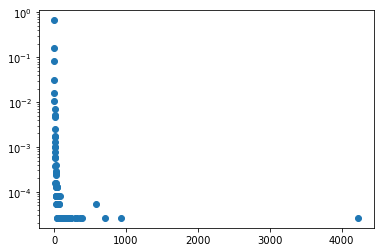

In [108]:
#plt.xscale('log')
plt.yscale('log')
plt.scatter(G_x, G_y)
    

In [101]:
nx.density(g)

4.575182970876192e-05

In [77]:
g = nx.read_graphml("data/NET-btc-heur_0-week/2010-10-18.graphml")
nx.density(g)

def randomize(g):
    graph = g.copy()
    undirected_graph = graph.to_undirected()
    nswap=np.random.randint(1,len(undirected_graph.edges())/2)
    max_tries=100*len(undirected_graph.edges())
    seed = np.random.randint(1,len(g))
    nx.algorithms.swap.double_edge_swap(undirected_graph, nswap=nswap,seed=seed, max_tries=max_tries)
    return undirected_graph.to_directed()
    
    

g_random = randomize(g)



In [109]:
nx.degree(g),nx.degree(g_random)

(DiDegreeView({'1966096': 3, '1966097': 1, '393238': 1, '2097178': 2, '2097181': 1, '1966112': 1, '2228258': 3, '1835046': 4, '1703988': 4, '393292': 1, '393306': 2, '2228316': 1, '1179742': 1, '1966188': 3, '655472': 15, '2228337': 2, '2228341': 1, '2228349': 2, '2228352': 2, '1835140': 1, '2228395': 1, '2228402': 2, '2293790': 1, '2228408': 1, '2097337': 3, '393402': 1, '2228256': 2, '2293793': 3, '1966284': 6, '2293797': 3, '1966310': 2, '2228457': 1, '524535': 2, '1573112': 1, '1310977': 1, '786691': 2, '655629': 1, '2162733': 2, '1835281': 1, '1311009': 5, '2228522': 1, '315': 5, '2228541': 2, '2228548': 28, '2228607': 1, '393613': 17, '1311128': 2, '2228640': 1, '2228649': 2, '2293831': 1, '1966509': 2, '1180082': 3, '1049033': 1, '917974': 1, '2151724': 2, '917977': 2, '917979': 1, '2228703': 5, '786915': 1, '1966564': 2, '2097640': 1, '2228724': 4, '2228725': 2, '2293844': 3, '2300119': 3, '2228748': 1, '393747': 16, '2228769': 2, '524848': 1, '655935': 1, '437005': 1, '2228820

0.0005146219335258902)

In [6]:
import time
start_time = time.time()


nr_cores = multiprocessing.cpu_count()

core_dict = {}
np_files = np.array(os.listdir("data/NET-btc-heur_0-week"))
directory = "data/NET-btc-heur_0-week"
chunk_lst = np.array_split(np_files, nr_cores)

for i in range(nr_cores):
    process_name = f"p{i}"
    file_name = f"test{i}.json"

    with io.open(os.path.join(file_name), 'w') as db_file:
        db_file.write(json.dumps({}))

    core_dict[process_name] = Process(target = files_walker(list(chunk_lst[i]),file_name, directory))
    
    core_dict[process_name].start()

    #core_dict[process_name].join()

print("--- %s seconds ---" % (time.time() - start_time))

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: 'data/NET-btc-heur_0-week'